# More Pandas

## Introduction

We have introduced various ways to *slice* a Pandas Dataframe i.e. extract a subset of the data. This notebook will go through other methods of extracting subset of data. Specifically we will be focusing on extract data based on the values of variables using the *groupby* methods in the Pandas. 

## Motivating Example

Recall our *MovieFinance.csv* dataset. What if we wish to analyse the movie data on a year-by-year basis? We can group the data based on the "Release Year" variable. 

Let's start by importing the relevant modules and the data first. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

In [2]:
mfin = pd.read_csv('../data/MovieFinances.csv', header=0)
mfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                5219 non-null   object 
 1   Month                5219 non-null   object 
 2   Day                  5219 non-null   int64  
 3   Release Year         5219 non-null   int64  
 4   Budget($M)           5219 non-null   float64
 5   Domestic Gross($M)   5219 non-null   float64
 6   Worldwide Gross($M)  5219 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 285.5+ KB


The dataframe has been created successfully. We can now create a dataframe that will organise the data based on "Released Year". The key method is called *groupby*. 

In [3]:
mfin_year = mfin.groupby('Release Year')
type(mfin_year), type(mfin)

(pandas.core.groupby.generic.DataFrameGroupBy, pandas.core.frame.DataFrame)

So the function *type* above allows one to find out the object type. In the example above, *mfin_year* is a _**DataFrameGroupBy**_ object whereas *mfin* is a _**DataFrame**_ object.

But what can we do with the *DataFrameGroupBy* object? Let's say we want to calculate the mean Domestic Gross and Worldwide Gross for each year, we can combine our knowledge of *slicing* in the *groupby* object. 

In [4]:
var = ['Domestic Gross($M)', 'Worldwide Gross($M)'] # create the list of the variables that we want
grossbyYear = mfin_year[var].mean() # This has two parts, the first part extracts the columns and the second part calculates the means. 
grossbyYear

Domestic Gross($M)  Worldwide Gross($M)
Release Year                                         
1915                   10.000000            11.000000
1916                    4.000000             4.000000
1920                    3.000000             3.000000
1925                   10.000000            15.500000
1927                    0.000000             0.000000
...                          ...                  ...
2012                   46.782595           120.045120
2013                   45.116518           110.717417
2014                   41.317979           102.988348
2015                   32.749798            83.975832
2016                   51.640742           134.505668

[92 rows x 2 columns]

Note that *grossbyYear* is just another dataframe which means we can treat it as another dataset. So we can utilise the plotting methods that come with each dataframe. 

We will have discuss *data visualisation* in a different module but for now we can simply use the *plot* method from the *DataFrame* object.  

The example below also demonstrates a few arguments that can be used within the *plot* method. For more information about the different arguments, see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

<AxesSubplot:xlabel='Release Year', ylabel='US Dollars in \\$M'>

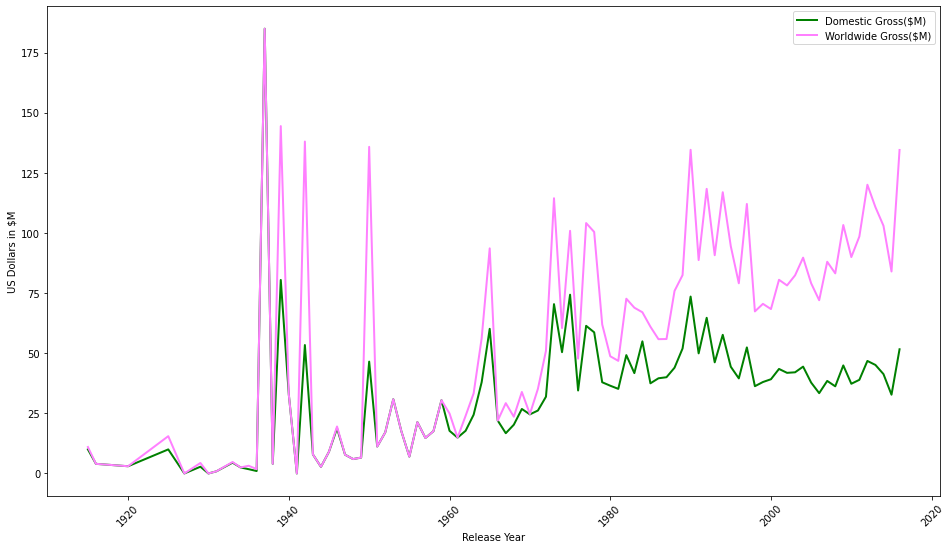

In [5]:
grossbyYear.plot(color=[(0,0.5,0), (1,0.5,1)], lw=2, figsize=[16,9], ylabel="US Dollars in \$M", rot=45)

In fact, by utilising the method *describe* we can get even more basic descriptive statistics from the dataframe. 

In [6]:
grossbyYear.describe()

Domestic Gross($M)  Worldwide Gross($M)
count           92.000000            92.000000
mean            32.902048            55.962500
std             25.610286            43.982464
min              0.000000             0.000000
25%             14.866667            15.350000
50%             35.701817            55.866079
75%             44.544714            88.973884
max            184.925485           184.925485

## Groupby more than one variable

*Groupby* is not limited by one variable. For example, we can groupby released year and released month, which create a *multi-index* dataframe. To do this, we put the variables that determined the group into a list

In [7]:
groupbylist = ['Release Year', 'Month']
mfin_yearMonth = mfin.groupby(groupbylist)[var]
grossbyYearMonth = mfin_yearMonth.mean()
grossbyYearMonth

Domestic Gross($M)  Worldwide Gross($M)
Release Year Month                                         
1915         Feb             10.000000            11.000000
1916         Dec              8.000000             8.000000
             Sep              0.000000             0.000000
1920         Sep              3.000000             3.000000
1925         Dec              9.000000             9.000000
...                                ...                  ...
2016         Mar             56.093754           139.068324
             May             97.854795           286.087913
             Nov              0.000000             0.000000
             Oct              0.000833             0.000833
             Sep             27.457272            48.984816

[614 rows x 2 columns]

Note that we have combined multiple tasks in the one line. We created a groupby dataframe with only the columns that were specified by the variable *var* (defined above). 

This is interesting and it is obvious that movies were not being released every month in every year. 

Note that the data above is first sorted by 'Release Year' first, then by 'Month' but obviously we may also want to sort this the other way round. First by month then by year. 

There are two ways to do this. Create another *groupby* object by change the order in which the variables appear in the list OR use the *reorder_levels* method. 

**Exercsie:** Create another groupby object that sort by *Month* first then by *Release Year*. 



While the first approach is treated as an exercise, we will demonstrate the second approach below.

In [8]:
grossbyMonthYear = grossbyYearMonth.reorder_levels([1,0])
grossbyMonthYear

Domestic Gross($M)  Worldwide Gross($M)
Month Release Year                                         
Feb   1915                   10.000000            11.000000
Dec   1916                    8.000000             8.000000
Sep   1916                    0.000000             0.000000
      1920                    3.000000             3.000000
Dec   1925                    9.000000             9.000000
...                                ...                  ...
Mar   2016                   56.093754           139.068324
May   2016                   97.854795           286.087913
Nov   2016                    0.000000             0.000000
Oct   2016                    0.000833             0.000833
Sep   2016                   27.457272            48.984816

[614 rows x 2 columns]

So the effort so far is about calculating the mean of the two columns for every month in every year. What if we want to know how many movies were released in each month of the year? We can use *size* and *count*. There are two differences between the two methods, one being more subtle than the other. We first demonstrate what each method returns then we will try to explain. 

In [9]:
mfin_yearMonth.size()

Release Year  Month
1915          Feb       1
1916          Dec       1
              Sep       1
1920          Sep       1
1925          Dec       1
                       ..
2016          Mar      19
              May       9
              Nov       3
              Oct       4
              Sep      14
Length: 614, dtype: int64

In [10]:
mfin_yearMonth.count()

Domestic Gross($M)  Worldwide Gross($M)
Release Year Month                                         
1915         Feb                     1                    1
1916         Dec                     1                    1
             Sep                     1                    1
1920         Sep                     1                    1
1925         Dec                     1                    1
...                                ...                  ...
2016         Mar                    19                   19
             May                     9                    9
             Nov                     3                    3
             Oct                     4                    4
             Sep                    14                   14

[614 rows x 2 columns]

The two differences are: *size* returns the number of cases in each month for each year _**including missing values**_. However, *count* returns the number of cases for each variable in each month for each year, _**excluding missing values**_. 

We can also find out easily which month in which year had the most number of movies released. 

In [11]:
mfin_yearMonth.count().idxmax(), mfin_yearMonth.count().max()

(Domestic Gross($M)     (2015, Dec)
 Worldwide Gross($M)    (2015, Dec)
 dtype: object,
 Domestic Gross($M)     52
 Worldwide Gross($M)    52
 dtype: int64)

**Exercise** See if you can find out which month in which year had the least number of movies released (strictly greater than 0). 

**GOTCHA:** The max and min function only returns the first occurrence in the case of a **tie**. What if we want to find out all of them? 

One way to do this is via conditional indexing as follows: 

In [12]:
maxM = mfin_yearMonth.size().max()
mfin_yearMonth.size().loc[mfin_yearMonth.size()==maxM, :]

Release Year  Month
2015          Dec      52
dtype: int64

In this case there is only one occurence of a max. 

**Exercise:** See if you can find out how many times the minimum number of movies has occured. 



In [19]:
minM = mfin_yearMonth.size().min()
mfin_min = mfin_yearMonth.size().loc[mfin_yearMonth.size()==minM, :]
mfin_min.head(10)

Release Year  Month
1915          Feb      1
1916          Dec      1
              Sep      1
1920          Sep      1
1925          Dec      1
              Jan      1
1927          Aug      1
1929          Feb      1
1930          Jan      1
1931          Dec      1
dtype: int64

One can also examine the data based on different index level. Note that in such cases, we will be examining the *DataFrame* object rather than the *DataFrameGroupby* object. 

In [13]:
grossbyYearMonth.count(level='Release Year')

Domestic Gross($M)  Worldwide Gross($M)
Release Year                                         
1915                           1                    1
1916                           2                    2
1920                           1                    1
1925                           2                    2
1927                           1                    1
...                          ...                  ...
2012                          12                   12
2013                          12                   12
2014                          12                   12
2015                          12                   12
2016                          12                   12

[92 rows x 2 columns]

**Exercise** Count the number of movies being released in each month over all the years. 

What if we want to know the titles of all the movies released in December 2015, the year when the most movies released. One way to do this is the following

In [14]:
# Recall groupbylist is ['Release Year', 'Month']
# Recall var = ['Domestic Gross($M)', 'Worldwide Gross($M)']
var01 = ['Movie']+ var # We are adding Movie into the list of columns that we want. 
maxgroup = mfin_yearMonth.size().idxmax() #This gives us the year/month we need. 
mfin.groupby(groupbylist)[var01].get_group(maxgroup)

Movie  Domestic Gross($M)  \
1           Star Wars Ep. VII: The Force Awakens          936.662225   
181                                 The Revenant          183.637894   
332                                  Point Break           28.782481   
333                      In the Heart of the Sea           25.020758   
383       Alvin and the Chipmunks: The Road Chip           85.886987   
526           Don Gato, el inicio de la pandilla            0.000000   
731                            The Hateful Eight           54.117416   
783                                          Joy           56.451232   
841                             The Ridiculous 6            0.000000   
966                               Daddy�??s Home          150.357137   
1223           Pourquoi j'ai pas mangǸ mon p��re            0.000000   
1379                                    The Crow            0.000000   
1498                                  Concussion           34.531832   
1661                                     Sisters           87.044645   
1789                             Grace of Monaco            0.000000   
1817                               The Big Short           70.259870   
2717                                     Krampus           42.725475   
2836  Chiamatemi Francesco - Il papa della gente            0.000000   
2843                           In Dubious Battle            0.000000   
3114                                San cheng ji            0.000000   
3503                                   Anomalisa            3.759286   
3535                         Henry Joseph Church            0.000000   
3644                                  �?�?���?�?            0.000000   
3942                               Aztec Warrior            0.000000   
4096                                    The Veil            0.000000   
4271                                     AWOL-72            0.000000   
4279                                   Unnatural            0.000000   
4280                                 Close Range            0.000000   
4299                                  Sardaar Ji            0.000000   
4464                 To Be Frank, Sinatra at 100            0.000000   
4482                                Good Ol' Boy            0.000000   
4484                                Wind Walkers            0.000000   
4486                                  Shark Lake            0.000000   
4499                                       Vaalu            0.000000   
4600                                    One Shot            0.000000   
4669                                   Departure            0.000000   
4758                           Karachi se Lahore            0.000000   
4781                               American Hero            0.000000   
4782                      Por amor en el caserio            0.000000   
4875                        Julija in alfa Romeo            0.000000   
4937                            Brooklyn Bizarre            0.000000   
4940                                  Rodeo Girl            0.000000   
5012                            Walking to Paris            0.000000   
5014                    Amidst the Devil's Wings            0.000000   
5050                       Shooting the Warwicks            0.000000   
5053                                       4-Nov            0.000000   
5097                               Lumea e a mea            0.000000   
5109                       Escaping the Holocost            0.000000   
5116                            Romantic Schemer            0.000000   
5138                            Lunchtime Heroes            0.000000   
5155                 The Brain That Wouldn't Die            0.000000   
5189                                 Dutch Kills            0.000000   

      Worldwide Gross($M)  
1             2058.662225  
181            532.950503  
332            128.131571  
333             90.420758  
383            235.296080  
526              4.534791  
731            145.478036  
78

**IMPORTANT NOTE:** The '+' operator between list means joining two list togehter. This is one of the reasons why understanding data types is important. The operator '+' is defined differently depends on the types in which it is being applied. For example, 2+3 gives 5 because '+' is defined as a sum operator. However, if we are "adding" two lists together, Python will simply join the list.  

## Dealing with Multi-index

So the example above uses multi-index and we are going to explore this a little further. Specifically, we are going see how we can slice the data with multi-index. 

The key idea is to utilise [*tuples*](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences). A $(index-0,index-1)$ convention for rows. For example, if we want to know the monthly means of both domestic and worldwide gross for all the movies being released between 2012 to 2016 in April and December, we can do the following

In [15]:
grossbyYearMonth.loc[(slice(2012,2016), ['Apr', 'Dec']), :]

Domestic Gross($M)  Worldwide Gross($M)
Release Year Month                                         
2012         Apr             20.782501            45.465891
             Dec             36.407087           102.786513
2013         Apr             20.753134            43.398182
             Dec             35.274839            86.255792
2014         Apr             46.138450           120.602434
             Dec             31.342541            69.047617
2015         Apr             24.244643            78.596693
             Dec             33.831485            75.551275
2016         Apr             57.985751           133.797843
             Dec              0.000000             1.143276

We use the *loc* method to extract the relevant part of the dataframe. We use the tuple (YearRange, MonthRange) to specify the year range and month range. Note the use of function *slice* to indicate the year range from 2012 to 2016. The range of month is presented by a list which contains all the months we want. If we want all the months i.e. select everyting, we can use *slice(None)* as follows:


In [16]:
grossbyYearMonth.loc[(slice(2012,2016), slice(None)), :]

Domestic Gross($M)  Worldwide Gross($M)
Release Year Month                                         
2012         Apr             20.782501            45.465891
             Aug             31.579893            68.561277
             Dec             36.407087           102.786513
             Feb             51.649340           103.752855
             Jan             34.409011            58.339915
             Jul             74.968408           223.724622
             Jun             65.334420           164.554538
             Mar             54.395792           108.115717
             May             78.100326           252.201839
             Nov             80.038477           223.839428
             Oct             32.909942            81.152040
             Sep             24.291864            67.796925
2013         Apr             20.753134            43.398182
             Aug             34.875665            77.563768
             Dec             35.274839            86.255792
             Feb             32.546732            63.477346
             Jan             24.264511            56.780822
             Jul             62.463252           174.752468
             Jun             86.441409           193.516815
             Mar             36.572184            80.880491
             May             76.289694           219.565614
             Nov             82.937182           211.455686
             Oct             31.392986            78.996799
             Sep             31.874659            66.332992
2014         Apr             46.138450           120.602434
             Aug             41.927853            94.198857
             Dec             31.342541            69.047617
             Feb             53.441957           109.433723
             Jan             28.821512            57.590004
             Jul             39.642976           107.034880
             Jun             57.366005           177.845386
             Mar             37.206207            92.889279
             May             84.282013           237.411686
             Nov             58.907435           161.608143
             Oct             30.989365            67.971764
             Sep             19.005788            40.395473
2015         Apr             24.244643            78.596693
             Aug             20.180651            38.438503
             Dec             33.831485            75.551275
             Feb             28.867108            78.003315
             Jan             14.658578            38.650406
             Jul             54.045060           161.884491
             Jun             84.115246           202.494866
             Mar             22.792021            50.539372
             May             52.198431           135.571140
             Nov             45.238895           116.244169
             Oct             19.748069            54.958609
             Sep             20.740090            58.230722
2016         Apr             57.985751           133.797843
             Aug             66.330420           131.788037
             Dec              0.000000             1.143276
             Feb             36.806892           127.480951
             Jan             28.287772            98.354500
             Jul             95.408440           219.734974
             Jun             82.491268           233.125796
             Mar             56.093754           139.068324
             May             97.854795           286.087913
             Nov              0.000000             0.000000
             Oct              0.000833             0.000833
             Sep             27.457272            48.984816